In general, we used the Titanic dataset, which contains the details of the passengers of the Titanic. We want to make a prediction model with the help of logistic regression that predicts the survival and death classification of passengers

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

### 1. Import Data

In [2]:
df =pd.read_csv('C:/Users/Admin/Classification/project-titanic/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###### 1-2  An overview of the data:

In [4]:
total = len(df)                           
print('total number of passengers: ' , total)
 
total_survived = len(df[df['Survived' ] == 1])                     
print('the number of passengers who survived: ' ,total_survived)

total_notsurvived = len(df[df['Survived'] == 0]) 
print('the number of passengers who not survived: ' ,total_notsurvived)

print('The percentage of passengers who survive: ' , 1.*total_survived/total*100 , '%' )
print('The percentage of passengers who notsurvived' , 1.*total_notsurvived/total*100 , '%' )

total number of passengers:  891
the number of passengers who survived:  342
the number of passengers who not survived:  549
The percentage of passengers who survive:  38.38383838383838 %
The percentage of passengers who notsurvived 61.61616161616161 %


###### 1-3 Data Visualization

The purpose of the model is to predict the target, so first we check which passengers will survive and which passengers will not survive

<AxesSubplot:xlabel='Survived', ylabel='count'>

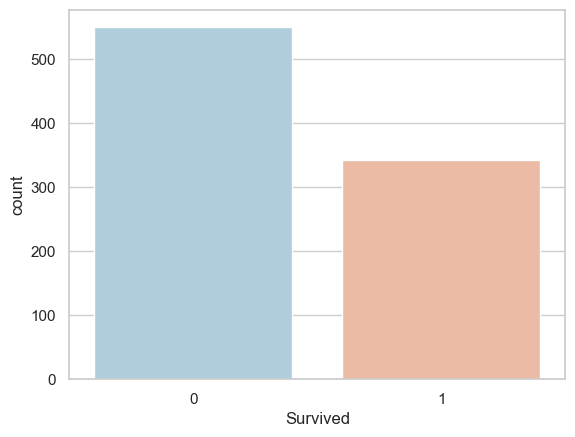

In [5]:
sns.countplot(x=df["Survived"],data=df , palette='RdBu_r')

What is the number of passengers who survived or not survived in different classes?

<AxesSubplot:xlabel='Pclass', ylabel='count'>

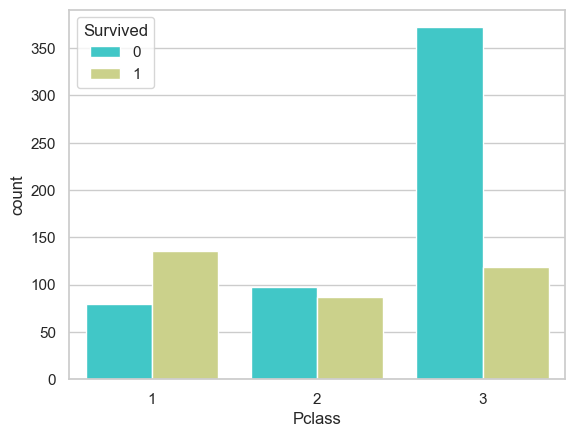

In [6]:
sns.countplot(x = df["Pclass"] , hue =df["Survived"] , palette='rainbow')

I want to know if those who survived are male or female

<AxesSubplot:xlabel='Survived', ylabel='count'>

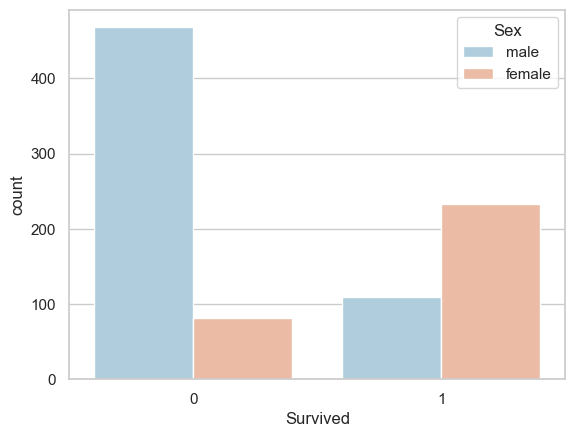

In [7]:
sns.countplot(x=df["Survived"]  ,hue=df["Sex"]  , palette='RdBu_r')

What is the age range of people?

the age column has a missing value and age is a numerical variable, so before drawing the graph, we drop the empty columns.

C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Age'>

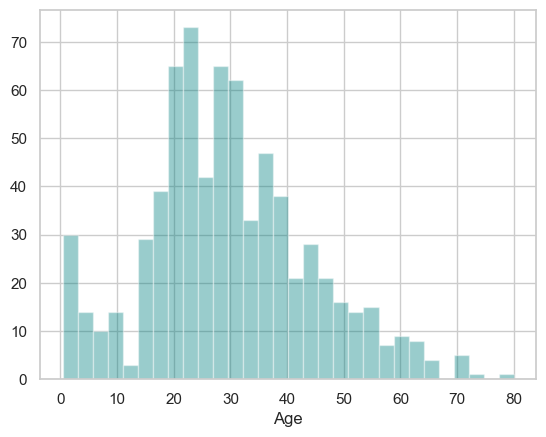

In [8]:
sns.distplot(df["Age"].dropna(),kde=False,color='teal',bins=30)

### 2.Data Cleaning

###### 2.1 Missing Value Assessment

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have missing in the following columns : Age-Cabin-Embarked

###### 2.1.1 Age - Missing Values

<AxesSubplot:xlabel='Sex', ylabel='Age'>

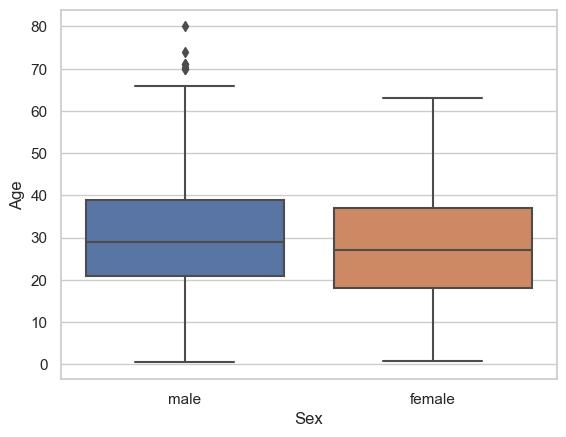

In [10]:
sns.boxplot(x='Sex' , y= 'Age' , data=df)

According to this chart, the average age of men is 20-39 years But the average age of women is 37-19 years

So you can't fill the missing values with the average

With the help of the fill_Age function, the missing values of the age column are randomly selected
Fill in the specific average for each gender

In [11]:
def fill_Age(data):
    Age = data[0]
    Sex = data[1]
    
    if pd.isnull(Age):
        if Sex is "male":
            return np.random.choice([21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39])
        else:
            return np.random.choice([19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37])
    else:
        return Age
        
df["Age"]= df[['Age' , 'Sex']].apply(fill_Age , axis=1)        

In [12]:
#To make sure that the missings are completely gone
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###### 2.1.2 Cabin - Missing Values

More than half of the data in the cabin column is null, so we delete it

In [13]:
df.drop('Cabin' , axis=1,inplace=True)

###### 2.1.3 Embarked - Missing Values

In [14]:
print(df['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


We want to fill the missing with the category that has the most repetitions

In [15]:
df['Embarked'].value_counts().idxmax()

'S'

In [16]:
df["Embarked"].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)

To make sure that the missings are completely gone

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##### 2.2 Remove  Additional Variables

The PassengerId,Name and Ticket columns have no effect on the survival and death of people, so we will delete them

In [18]:
df.drop(['PassengerId','Name', 'Ticket'], axis=1, inplace=True)

In [19]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


##### 2.3 Converting Categorial

We need to convert categorical features to number using get_dummies in  pandas 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


sex and embarked columns are of categorical type

###### 2.3.1 Sex Converting

In [21]:
sex = pd.get_dummies(df['Sex'], drop_first= True)

In [22]:
df['Sex']=sex

###### 2.3.2 Embarked Converting

In [23]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
embarked = label_encoder.fit_transform(df['Embarked'])
df['Embarked'] = embarked

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### 3.Building a Logistic Regression model

In [27]:
X = df.drop('Survived' , axis =1)
y = df['Survived']

###### 3.1 Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

###### 3.2 create model

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [32]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

### 4.Evaluation

Comparing the actual value and the value predicted by the model

###### 4.1confusion_matrix

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

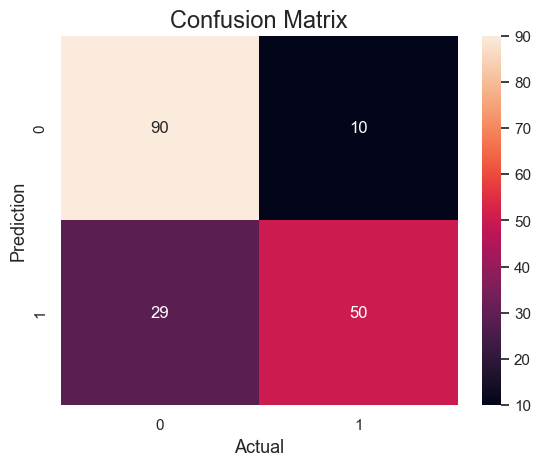

In [34]:
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

From class zero, 91 correct and 9 wrong
From the one class, he recognized 29 correct and 50 incorrect

The model in the  class one made a  wrong detected and 50 of the passengers who survived as dead

###### 4.2 classification_report

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       100
           1       0.83      0.63      0.72        79

    accuracy                           0.78       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179

